In [14]:
!pip install plotly
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
%matplotlib inline
import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.15 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
df = pd.read_csv("housingdata.csv",header = None)
df.head()

0     1     2   3      4      5     6       7   8    9     10      11  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296  15.3  396.90   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242  17.8  396.90   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242  17.8  392.83   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222  18.7  394.63   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222  18.7  396.90   

     12    13  
0  4.98  24.0  
1  9.14  21.6  
2  4.03  34.7  
3  2.94  33.4  
4  5.33  36.2

In [16]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = housing_colnames
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

13


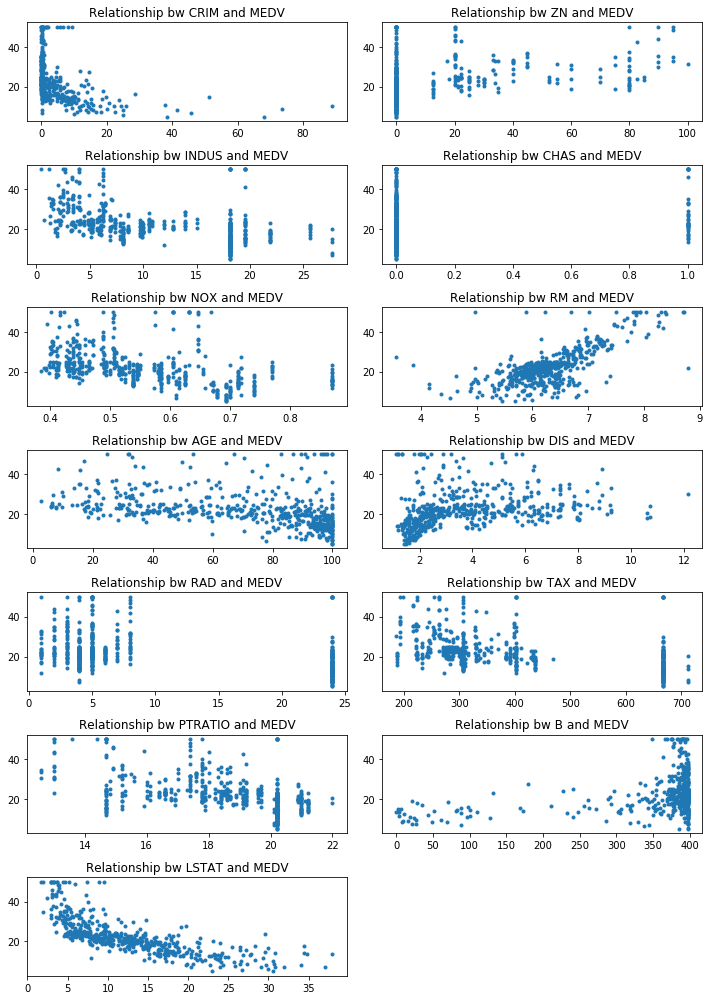

In [17]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df[col],df["MEDV"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plotFeatures(colnames,"Relationship bw %s and MEDV")
#plot.show()

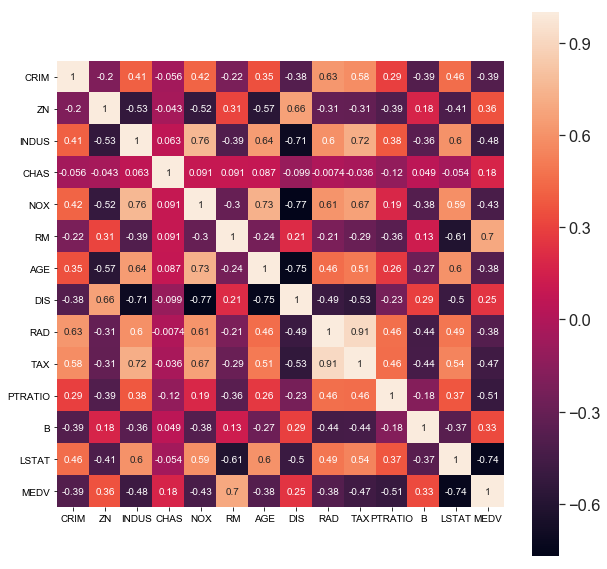

In [18]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [19]:
def predictPrice(x,theta):
    return np.dot(x,theta)

In [20]:
def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2

In [21]:
def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,theta)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()

In [22]:
def gradientDescentLinearRegression(alpha=0.047,iter=5000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = df["RM"]
    x = np.column_stack((np.ones(len(predictor)),predictor))
    Y = df["MEDV"]
    theta = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = np.array([t0,t1])
        J = calculateCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')

Iteration: 1,Cost = 258.0310838585914,theta = [1.0590419  6.86646571]


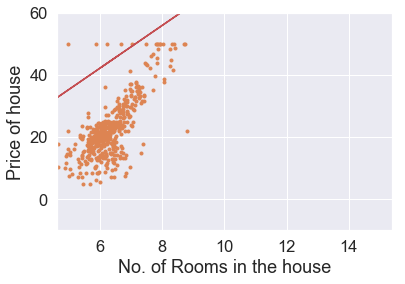

Iteration: 1001,Cost = 24.266176819465997,theta = [-14.66352286   5.95689176]


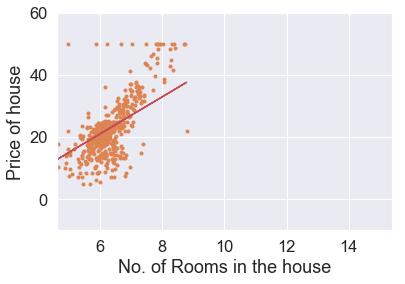

Iteration: 2001,Cost = 22.59641457365931,theta = [-23.30244842   7.31497465]


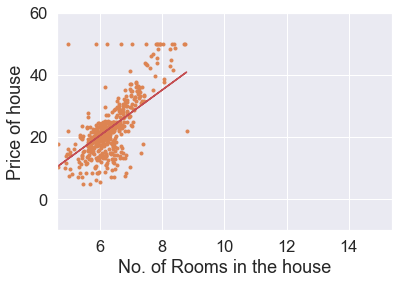

Iteration: 3001,Cost = 22.05731654846794,theta = [-28.21114608   8.08664681]


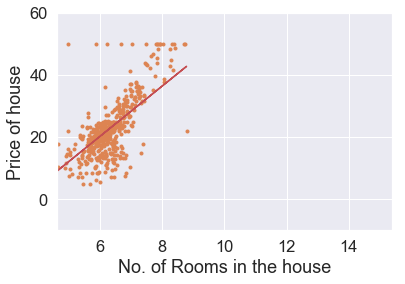

Iteration: 4001,Cost = 21.883263816412775,theta = [-31.00030227   8.52511631]


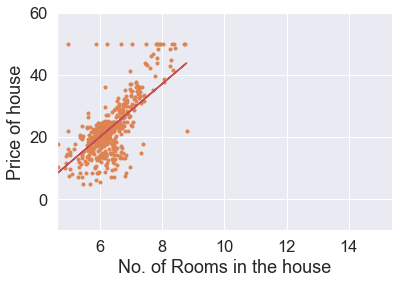

theta0 = 5000
theta1 = 5000
Costs = 5000


In [24]:
gradientDescentLinearRegression()